## 데이터4 카테고리 기반 문제 유형
<img src="./category_2.png" width="600">

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
import pandas as pd
import numpy as np
import json
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import torch.optim as optim
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
from PIL import Image, ImageDraw
import cv2
import random

import matplotlib
import matplotlib.pyplot as plt

050068
Answers : [1, 2]


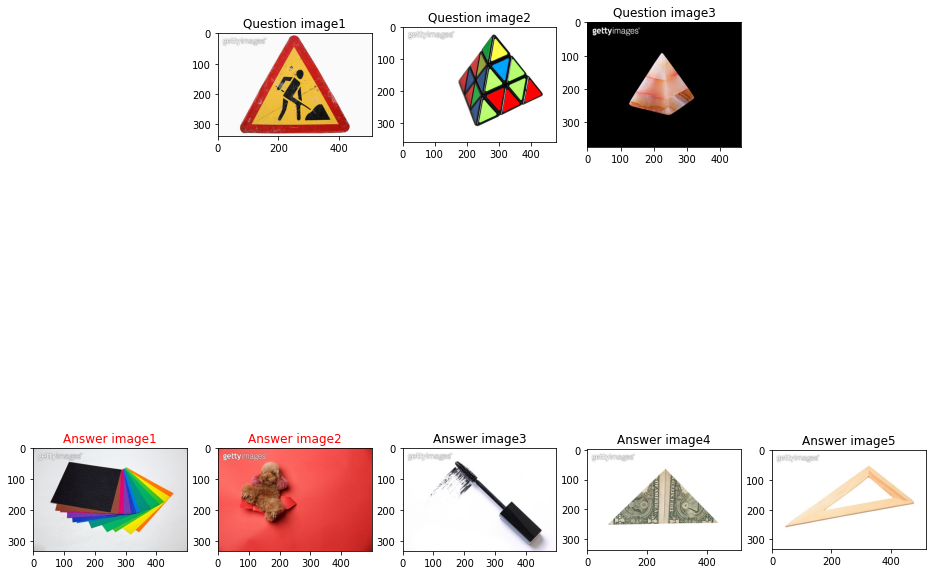

In [3]:
import os
os.chdir(f'/home/ktlim/Visual_Reasoning/task1/')
folder_name = os.listdir("./datasets/similarity4")[10]
os.chdir(f'/home/ktlim/Visual_Reasoning/task1//datasets/similarity4/{folder_name}')

file_list = os.listdir(f"./")
for file_name in file_list:
    if file_name.endswith('.json'):
        json_file = file_name
        file_list.remove(file_name)
"""
print(f'jpg_list : {file_list}')
print(f'json_file : {json_file}')
"""

a_data = json.load(open(f'./{json_file}'))

questions = []
answers = []

for i in range(len(a_data['Questions'][0]['images'])):
    question_i = {'img_url' : a_data['Questions'][0]['images'][i]['image_url']}
    questions.append(question_i)

for i in range(len(a_data['Answers'])):
    answer_i = {'id' : a_data['Answers'][i]['group_id'], 'img_url' : a_data['Answers'][i]['images'][0]['image_url']}
    answers.append(answer_i)

correct_id = a_data['correct_answer_group_ID']
print(folder_name)
print(f'Answers : {correct_id}')


plt.figure(figsize=(16, 14))

# Plot Question Images

for i in range(len(questions)):
    question_img = Image.open(f'./{questions[i]["img_url"]}')
    plt.subplot(2, len(answers), i+2)
    plt.gca().set_title("Question image"+str(i+1))
    plt.imshow(question_img)

for i in range(len(answers)):
    answer_img = Image.open(f'./{answers[i]["img_url"]}')
    plt.subplot(2, len(answers), i+len(answers)+1)

    if i+1 in correct_id:
        plt.gca().set_title("Answer image"+str(i+1), color = 'r')
    else:
        plt.gca().set_title("Answer image"+str(i+1))
    plt.imshow(answer_img)

plt.show()

In [4]:
a_data

{'dataset_name': '유사성 기반 출제(4)',
 'doc_id': '050068',
 'year': '2022',
 'difficulty': '',
 'correct_rate': '',
 'category': '삼각형',
 'type': 4,
 'answer_type': 'Multiple_choice',
 'is_correct': None,
 'correct_answer_group_ID': [1, 2],
 'Questions': [{'group_id': '024599',
   'images': [{'id': 63996,
     'image_url': '15bc237b39de4fcba56147765d57f194.jpg'},
    {'id': 63997, 'image_url': 'f9eae98b2cbd492a936210fd377f5243.jpg'},
    {'id': 63998, 'image_url': '74b2298000db4beda8c9a40b04457fe9.jpg'}]}],
 'Answers': [{'group_id': 1,
   'images': [{'id': 63999,
     'image_url': '95e7225e65174c0db3df8ef164f7ce6a.jpg'}]},
  {'group_id': 2,
   'images': [{'id': 64000,
     'image_url': '67c40005f9eb4bf391ba17283742b00e.jpg'}]},
  {'group_id': 3,
   'images': [{'id': 64001,
     'image_url': '986be2d5891f479a854c33511549a5f8.jpg'}]},
  {'group_id': 4,
   'images': [{'id': 64002,
     'image_url': '4715ea71c7cb4a999e266bf938c0514a.jpg'}]},
  {'group_id': 5,
   'images': [{'id': 64003,
     'im

In [5]:
os.chdir(f'/home/ktlim/Visual_Reasoning/task1/')
print(f'Total #Data : {len(os.listdir("./datasets/similarity4/"))}')

Total #Data : 1998


In [6]:
# #Dataset에서 007879 폴더 오류

# import shutil
# shutil.rmtree(f'./category_data/category_2/007879')

os.chdir(f'/home/ktlim/Visual_Reasoning/task1/')
folder_name = sorted(os.listdir("./datasets/similarity4/"))
len(folder_name)

for elements in folder_name:
    file_list = os.listdir(f"./datasets/similarity4/{elements}")

file_list

['d7df7cefb02940a58abcc441ac2d43d5.jpg',
 '55bb6ebad7b0417d90b5cc79c4f3a60a.jpg',
 'd448d1e1070843f2b70714c3051454bb.jpg',
 '063997.json',
 '33caf2cd00fb4d9a98347c24eb9ec43a.jpg',
 'b5871a8d9dfe410884d41cb09ef4107f.jpg',
 '9d0247a02e54495cac3c2bed5a384bc8.jpg',
 '9cace342867444f48f342aa8e551d65b.jpg',
 '7cca12fe66864ab99d50dd2d4932886e.jpg']

In [7]:
os.chdir(f'/home/ktlim/Visual_Reasoning/task1/')
folder_name = sorted(os.listdir("./datasets/similarity4/"))

for elements in folder_name:
    file_list = os.listdir(f"./datasets/similarity4/{elements}")
    for file_name in file_list:
        if file_name.endswith('.json'):
            json_file = file_name
            file_list.remove(file_name) 
    a_data = json.load(open(f'./datasets/similarity4/{elements}/{json_file}'))
    
    for i in range(len(a_data['Questions'][0]['images'])):
        question_i = {'img_url' : a_data['Questions'][0]['images'][i]['image_url']}
        questions.append(question_i)

    for i in range(len(a_data['Answers'])):
        answer_i = {'id' : a_data['Answers'][i]['group_id'], 'img_url' : a_data['Answers'][i]['images'][0]['image_url']}
        answers.append(answer_i)

In [8]:
os.chdir(f'/home/ktlim/Visual_Reasoning/task1/')
folder_name = sorted(os.listdir("./datasets/similarity4/"))

question_img_1 = []
question_img_2 = []
question_img_3 = []

q_arr = [question_img_1, question_img_2, question_img_3]

answer_img_1 = []
answer_img_2 = []
answer_img_3 = []
answer_img_4 = []
answer_img_5 = []

a_arr = [answer_img_1, answer_img_2, answer_img_3, answer_img_4, answer_img_5]

label = []

try_count = 0
except_count = 0



for elements in folder_name:
    file_list = os.listdir(f"./datasets/similarity4/{elements}")
    for file_name in file_list:
        if file_name.endswith('.json'):
            json_file = file_name
            file_list.remove(file_name) 
    a_data = json.load(open(f'./datasets/similarity4/{elements}/{json_file}'))


    if len(a_data['Answers']) != 5:
        print(elements)
    
    label.append(a_data['correct_answer_group_ID'])
    
    for i in range(len(a_data['Questions'][0]['images'])):
        question_i = 0
        question_i = {'img_url' : a_data['Questions'][0]['images'][i]['image_url']}

        q_arr[i].append(question_i['img_url'])
        try_count += 1




    for i in range(len(a_data['Answers'])):
        answer_i = {'id' : a_data['Answers'][i]['group_id'], 'img_url' : a_data['Answers'][i]['images'][0]['image_url']}
        a_arr[i].append(answer_i['img_url'])


In [9]:
print(len(q_arr[0]))
print(len(q_arr[1]))
print(len(q_arr[2]))
print(len(a_arr[0]))
print(len(a_arr[1]))
print(len(a_arr[2]))
print(len(a_arr[3]))
print(len(a_arr[4]))


1998
1998
1998
1998
1998
1998
1998
1998


In [10]:
df = pd.DataFrame(zip(folder_name, q_arr[0], q_arr[1], q_arr[2], a_arr[0], a_arr[1], a_arr[2], a_arr[3], a_arr[4], label), columns=['folder_name', 'q_img_1', 'q_img_2', 'q_img_3', 'a_img_1', 'a_img_2', 'a_img_3', 'a_img_4', 'a_img_5', 'label'])
df

,folder_name,q_img_1,q_img_2,q_img_3,a_img_1,a_img_2,a_img_3,a_img_4,a_img_5,label
0,003001,8e685e843e5246f697a16221c36d9665.jpg,3c8a1dc6664e4c15ad48f29645bea711.jpg,2bf1969bd3f7455898e58add06c73e02.jpg,b101496b621649b2919a802b0f563071.jpg,6e8dc8b724064b3ea11469a90a26699d.jpg,e368c9f4259c4933b55b9d7d9c50bbbc.jpg,c0ad1c177c7c4b2aa24e6aeb0745579e.jpg,095ff15a7b0a41ffa9754118b2d998fd.jpg,"[1, 2]"
1,003004,58338f62067949bc9961199442ae60d6.jpg,f69d2550960647a3a00faa8fd46222ad.jpg,c6a263c69bf64ea192c619c20f1069d2.jpg,3b1f272ec48044c7afdd24defd33ee56.jpg,abb17902ac374c16ae4504450a422e48.jpg,9ac57191240a40d98b163f4845463fb9.jpg,5d55d50d1126409f921c09e30d6fb721.jpg,bb2c2444dde44939b453f13cdb9c0ed0.jpg,"[1, 2]"
2,003005,291850bfcc444e44a0991bd831bbc902.jpg,0ca2fb92d5a1423585707348193b9c73.jpg,bab82ef5b16b42369acdeffd5af9a3af.jpg,1ea0bec133374e389e8ec9b7ce405d45.jpg,493842a831874339bd5aa3ac38eb86d7.jpg,61eaa6e075f04739beb08efeeff23c10.jpg,a5812423550042b18300763af52400a6.jpg,30fddfb174e84dbfb1977ed942340e23.jpg,"[1, 2]"
3,003006,98722f2473894febb7680b6676f64b8f.jpg,dadd9c5c0e9444d8a1ceff83a15ddbae.jpg,9fc4a7a1ae374f969456518b80df3a63.jpg,906a5c4c50494ec8a4dd3cecece99205.jpg,6c862ef9296d4eeda1c094ad83d925d9.jpg,dc585415dce747b6b97d4ef420dc660f.jpg,6cd6475f832b45eb999dee6444f46b48.jpg,8c40f794a3d54e3b84557bede547b9c8.jpg,"[1, 2]"
4,003007,e3f4cbf1650b42aaa1838a789ef67350.jpg,d58b292169a24d95b8b9f88d92e2ecdc.jpg,e5084fa342d143fc8b6d530a561d2850.jpg,c3a48f1d566a4655a8629b0c4c84498f.jpg,a5f0debc7406428f9add5f38d2a33a40.jpg,c5634005aa50473dbd719baee7e39e85.jpg,b5d6744527e34c6c831a2eff82595f04.jpg,2bea26b1ce774bfd91d772a7c4a8621b.jpg,"[1, 2]"
...,...,...,...,...,...,...,...,...,...,...
1993,063957,5f2adfef15a44f02aff1af3fc281e546.jpg,8fee30c3154f4cbca1fa6883180a8d24.jpg,167ea089440e49acb6530c86f331aa70.jpg,d56b4d37d6ed4d0e929744766d22b723.jpg,bfc98b78f9f74503a147f35f21766330.jpg,bc2c655197ad44d280412bedf87c3a43.jpg,58fd116f58c94888a7a7a93a40547ccf.jpg,177c36cce7ae46fa8c7a94c6141715dc.jpg,"[1, 2]"
1994,063973,22d990397a6940c3884864968f8b0aed.jpg,0a0ce22813064e94931a2cc8dbff0a6c.jpg,d86eaf8b659b47328b06788024da3475.jpg,1af0334e52194c1d939907711b1c3205.jpg,c03871793d85409a9e9178c1b526fd7a.jpg,6776e8fb913e47cb9d674e4541be05c3.jpg,47edae2dc53c478f818d37d667bede97.jpg,ee0ed0fc43194c27a5bbb792533e3556.jpg,"[1, 2]"
1995,063976,240bd29b43bd40b89ed1d578ae5d3773.jpg,5aafd23f2ef14256ad89ba71c1ff7bda.jpg,d576d6ce9cf2440aa0d16f9f9ba38843.jpg,1679a76d83604ff284c65e3f2f82b20e.jpg,ac441b4d30bc4ab4b46bc4f5eb36dab2.jpg,7fff5f27c56d4f959db4e8269f067b10.jpg,0f86bf1a6da24628982ea73e828b4fbc.jpg,b42c14e9652a4da4ab624903b0f12667.jpg,"[1, 2]"
1996,063996,8296cae18e894852a339ba521e4d86d9.jpg,ec391638474942d7bb0a8a030e013b4c.jpg,d31c47803b164e12b5716bcf5d149265.jpg,fc585ca13ad24b75b45ad5180201f6cd.jpg,8ae0aae776da42f895dd9349be6a0955.jpg,dfbbfa3708ed4789adba1c80bf337a20.jpg,19bba589d37045fc9c7523d59d9ce6e8.jpg,ec0d5f6e69b4475fa4ff0bd1c63ea943.jpg,"[1, 2]"


In [11]:
transform = transforms.Compose(
    [
        transforms.Resize((256, 256)),
        transforms.RandomCrop((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

In [12]:
df['label']

0       [1, 2]
1       [1, 2]
2       [1, 2]
3       [1, 2]
4       [1, 2]
         ...  
1993    [1, 2]
1994    [1, 2]
1995    [1, 2]
1996    [1, 2]
1997    [1, 2]
Name: label, Length: 1998, dtype: object

In [13]:
sample = df.iloc[0]
true_label = sample['label']
false_label = [1, 2, 3, 4, 5]

for t_label in true_label:
    false_label.remove(t_label)

false_label




[3, 4, 5]

In [14]:
class Category2_Dataset(torch.utils.data.Dataset):
    def __init__(self, df, config=None, transform=None):
        self.df = df
        self.config = config
        self.transform = transform
        
        
    def __len__(self):
        return len(self.df)
        
    def __getitem__(self, idx):
        sample = self.df.iloc[idx]
        
        folder = sample['folder_name']+'/'

        q_img_1_path = './datasets/similarity4/'+folder+sample['q_img_1']
        q_img_2_path = './datasets/similarity4/'+folder+sample['q_img_2']
        q_img_3_path = './datasets/similarity4/'+folder+sample['q_img_3']

        a_img_1_path = './datasets/similarity4/'+folder+sample['a_img_1']
        a_img_2_path = './datasets/similarity4/'+folder+sample['a_img_2']
        a_img_3_path = './datasets/similarity4/'+folder+sample['a_img_3']
        a_img_4_path = './datasets/similarity4/'+folder+sample['a_img_4']
        a_img_5_path = './datasets/similarity4/'+folder+sample['a_img_5']


        true_label = sample['label']
        false_label = [1, 2, 3, 4, 5]

        for t_label in true_label:
            false_label.remove(t_label)

        
        q_img_1_feature = Image.open(q_img_1_path).convert('RGB')
        q_img_2_feature = Image.open(q_img_2_path).convert('RGB') 
        q_img_3_feature = Image.open(q_img_3_path).convert('RGB')  
        
        a_img_path = [a_img_1_path, a_img_2_path, a_img_3_path, a_img_4_path, a_img_5_path]
        
        true_features = []
        false_features = []
        for t_label in true_label:
            true_feature = Image.open(a_img_path[t_label-1]).convert('RGB')
            true_features.append(true_feature)

        for f_label in false_label:
            false_feature = Image.open(a_img_path[f_label-1]).convert('RGB')
            false_features.append(false_feature)
            
        
        q_img_1_feature = self.transform(q_img_1_feature)  
        q_img_2_feature = self.transform(q_img_2_feature)  
        q_img_3_feature = self.transform(q_img_3_feature)  

        for idx in range(len(true_features)):
            true_features[idx] = self.transform(true_features[idx])

        for idx in range(len(false_features)):
            false_features[idx] = self.transform(false_features[idx])

        return {
            "label": true_label,
            "q_img_1": q_img_1_feature,
            "q_img_2": q_img_2_feature,
            "q_img_3": q_img_3_feature,
            "t_img_1": true_features[0],
            "t_img_2": true_features[1],
            "f_img_1": false_features[0],
            "f_img_2": false_features[1],
            "f_img_3": false_features[2],
        }
        
    

In [15]:
class VRCategory(nn.Module):
    def __init__(self, config):
        super(VRCategory, self).__init__()
        
        self.config = config
        self.backborne = torchvision.models.resnet50(pretrained=True)
        self.backborne.fc = nn.Linear(self.backborne.fc.in_features, self.config.input_dim)
        self.fc = nn.Sequential(
                    nn.Linear(self.config.input_dim*4, self.config.mlp_hidden),
                    nn.ReLU(),
                    nn.Dropout(0.2),
                    nn.Linear(self.config.mlp_hidden, 2), 
        )

    def forward(self, samples):
        
        #Question Image Features
        q_img1 = self.backborne(samples["q_img_1"])
        q_img2 = self.backborne(samples["q_img_2"])
        q_img3 = self.backborne(samples["q_img_3"])

        
        #True Answer Image Features
        t_img_1 = self.backborne(samples["t_img_1"])
        t_img_2 = self.backborne(samples["t_img_2"])

        #False Answer Image Features
        f_img_1 = self.backborne(samples["f_img_1"])
        f_img_2 = self.backborne(samples["f_img_2"])
        f_img_3 = self.backborne(samples["f_img_3"])

        true_tensor_1 = torch.cat([q_img1, q_img2, q_img3, t_img_1], axis=1)
        true_tensor_2 = torch.cat([q_img1, q_img2, q_img3, t_img_2], axis=1)

        false_tensor_1 = torch.cat([q_img1, q_img2, q_img3, f_img_1], axis=1)
        false_tensor_2 = torch.cat([q_img1, q_img2, q_img3, f_img_2], axis=1)
        false_tensor_3 = torch.cat([q_img1, q_img2, q_img3, f_img_3], axis=1)

        
        true_logit_1 = self.fc(true_tensor_1)
        true_logit_2 = self.fc(true_tensor_2)
        false_logit_1 = self.fc(false_tensor_1)
        false_logit_2 = self.fc(false_tensor_2)
        false_logit_3 = self.fc(false_tensor_3)

        return {
            "true_logit_1": F.log_softmax(true_logit_1, dim=1),
            "true_logit_2": F.log_softmax(true_logit_2, dim=1),
            "false_logit_1": F.log_softmax(false_logit_1, dim=1),
            "false_logit_2": F.log_softmax(false_logit_2, dim=1),
            "false_logit_3": F.log_softmax(false_logit_3, dim=1),
        }


In [16]:
def train_fn(model, train_loader, optimizer, loss_fn, config):
    total_count_correct = 0
    total_num_example = 0
    total_loss = []
    
    model.train()
    device = "cuda"
    loss_list = []
    acc_list = []
    
    for batch in tqdm(train_loader):            
        rand_idx_f = random.randint(0, 2)
        rand_idx_t = random.randint(0, 1)

        true_logits_arr = ["true_logit_1", "true_logit_2"]
        false_logits_arr = ["false_logit_1", "false_logit_2", "false_logit_3"]

        #Question Image Feature
        batch["q_img_1"] = batch["q_img_1"].to(device)
        batch["q_img_2"] = batch["q_img_2"].to(device)
        batch["q_img_3"] = batch["q_img_3"].to(device)

        #True Answer Image Feature
        batch["t_img_1"] = batch["t_img_1"].to(device)
        batch["t_img_2"] = batch["t_img_2"].to(device)

        #False Answer Image Feature
        batch["f_img_1"] = batch["f_img_1"].to(device)
        batch["f_img_2"] = batch["f_img_2"].to(device)
        batch["f_img_3"] = batch["f_img_3"].to(device)

        logits = model(batch)

        correct_target = torch.LongTensor([1]*len(batch['label'][0])).to(device)
        incorrect_target = torch.LongTensor([0]*len(batch['label'][0])).to(device)

        t_loss = loss_fn(logits[true_logits_arr[rand_idx_t]].squeeze(), correct_target)
        f_loss = loss_fn(logits[false_logits_arr[rand_idx_f]].squeeze(), incorrect_target)

        loss = t_loss + f_loss


        total_loss.append(loss.item())

        predicted = logits[true_logits_arr[rand_idx_t]].argmax(dim=1, keepdim=True).squeeze()
        total_count_correct += torch.sum(predicted == correct_target).item()
        total_num_example += len(batch['label'][0])

        predicted = logits[false_logits_arr[rand_idx_f]].argmax(dim=1, keepdim=True).squeeze()
        total_count_correct += torch.sum(predicted == incorrect_target).item()
        total_num_example += len(batch['label'][0])


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("TRAIN_LOSS:", str(sum(total_loss)/total_num_example) + " TRAIN_Accuracy: " + str(total_count_correct/total_num_example) )
        
    return sum(total_loss)/total_num_example, total_count_correct/total_num_example


In [17]:
def valid_fn(model, valid_loader, config):
    
    total_count_correct = 0
    total_num_example = 0
    device = "cuda"
    total_loss = []
    model.eval()
    with torch.no_grad():
        for batch in tqdm(valid_loader):          
            rand_idx_f = random.randint(0, 2)
            rand_idx_t = random.randint(0, 1)


            true_logits_arr = ["true_logit_1", "true_logit_2"]
            false_logits_arr = ["false_logit_1", "false_logit_2", "false_logit_3"]

            #Question Image Feature
            batch["q_img_1"] = batch["q_img_1"].to(device)
            batch["q_img_2"] = batch["q_img_2"].to(device)
            batch["q_img_3"] = batch["q_img_3"].to(device)

            #True Answer Image Feature
            batch["t_img_1"] = batch["t_img_1"].to(device)
            batch["t_img_2"] = batch["t_img_2"].to(device)

            #False Answer Image Feature
            batch["f_img_1"] = batch["f_img_1"].to(device)
            batch["f_img_2"] = batch["f_img_2"].to(device)
            batch["f_img_3"] = batch["f_img_3"].to(device)

            logits = model(batch)

            correct_target = torch.LongTensor([1]*len(batch['label'][0])).to(device)
            incorrect_target = torch.LongTensor([0]*len(batch['label'][0])).to(device)

            t_loss = loss_fn(logits[true_logits_arr[rand_idx_t]].squeeze(), correct_target)
            f_loss = loss_fn(logits[false_logits_arr[rand_idx_f]].squeeze(), incorrect_target)

            loss = t_loss + f_loss
            total_loss.append(loss.item())

            predicted_a1 = logits[true_logits_arr[rand_idx_t]].argmax(dim=1, keepdim=True).squeeze()
            total_count_correct += torch.sum(predicted_a1 == correct_target).item()
            total_num_example += len(batch['label'][0])

            predicted = logits[false_logits_arr[rand_idx_f]].argmax(dim=1, keepdim=True).squeeze()
            total_count_correct += torch.sum(predicted == incorrect_target).item()
            total_num_example += len(batch['label'][0])
    print("Valid Accuracy: " + str(total_count_correct/total_num_example))
    print("loss, ", sum(total_loss)/total_num_example)
            
    return sum(total_loss)/total_num_example, total_count_correct/total_num_example


In [18]:
class Config:
    def __init__(self, args=None):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.distributed = False
        self.gpu_id = "0,1"
        self.input_dim = 512
        self.mlp_hidden = 1024
        self.n_epoch = 8
        self.batch_size = 32

config = Config()

In [19]:
train_df, valid_df = train_test_split(df)

train_datasets = Category2_Dataset(train_df, transform=transform)
train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=config.batch_size, num_workers=32)

valid_datasets = Category2_Dataset(valid_df, transform=transform)
valid_loader = torch.utils.data.DataLoader(valid_datasets, batch_size=config.batch_size, num_workers=32)

model = VRCategory(config)
#vrs1_model = torch.nn.DataParallel(vrs1_model)
model = model.to(config.device)
if config.distributed:
    #vrs1_model = torch.nn.parallel.DistributedDataParallel(model, device_ids=[config.gpu])    
    model = torch.nn.parallel.DistributedDataParallel(model)    

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.NLLLoss(reduction="sum")


In [20]:
train_loss_list = []
train_acc_list = []

vali_loss_list = []
vali_acc_list = []

for epoch in range(config.n_epoch):
    train_loss, train_acc = train_fn(model, train_loader=train_loader, optimizer=optimizer, loss_fn=loss_fn, config=config)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    
    vali_loss, vali_acc = valid_fn(model, valid_loader=valid_loader, config=config)
    vali_loss_list.append(vali_loss)
    vali_acc_list.append(vali_acc)
        

100%|██████████| 47/47 [00:27<00:00,  1.72it/s]


TRAIN_LOSS: 0.6748012433223953 TRAIN_Accuracy: 0.5670894526034713


100%|██████████| 16/16 [00:07<00:00,  2.18it/s]


Valid Accuracy: 0.503
loss,  0.8384652137756348


100%|██████████| 47/47 [00:27<00:00,  1.72it/s]


TRAIN_LOSS: 0.5702769323407569 TRAIN_Accuracy: 0.7062750333778371


100%|██████████| 16/16 [00:07<00:00,  2.21it/s]


Valid Accuracy: 0.5
loss,  0.7759997310638428


100%|██████████| 47/47 [00:27<00:00,  1.71it/s]


TRAIN_LOSS: 0.5442592594747709 TRAIN_Accuracy: 0.7229639519359146


100%|██████████| 16/16 [00:07<00:00,  2.20it/s]


Valid Accuracy: 0.525
loss,  0.6989908599853516


100%|██████████| 47/47 [00:27<00:00,  1.71it/s]


TRAIN_LOSS: 0.3207145685824915 TRAIN_Accuracy: 0.880173564753004


100%|██████████| 16/16 [00:07<00:00,  2.20it/s]


Valid Accuracy: 0.499
loss,  1.5394416122436523


100%|██████████| 47/47 [00:27<00:00,  1.72it/s]


TRAIN_LOSS: 0.20622485774620194 TRAIN_Accuracy: 0.9382510013351135


100%|██████████| 16/16 [00:07<00:00,  2.19it/s]


Valid Accuracy: 0.5
loss,  1.8452369995117188


100%|██████████| 47/47 [00:27<00:00,  1.72it/s]


TRAIN_LOSS: 0.2854268633435979 TRAIN_Accuracy: 0.8808411214953271


100%|██████████| 16/16 [00:07<00:00,  2.17it/s]


Valid Accuracy: 0.51
loss,  1.4629371490478515


100%|██████████| 47/47 [00:27<00:00,  1.71it/s]


TRAIN_LOSS: 0.1586092930630307 TRAIN_Accuracy: 0.9325767690253671


100%|██████████| 16/16 [00:07<00:00,  2.17it/s]


Valid Accuracy: 0.504
loss,  0.9572353134155274


100%|██████████| 47/47 [00:27<00:00,  1.71it/s]


TRAIN_LOSS: 0.11290865475921152 TRAIN_Accuracy: 0.9636181575433912


100%|██████████| 16/16 [00:07<00:00,  2.20it/s]

Valid Accuracy: 0.5
loss,  2.1491611862182616


054784 annotation 잘못됨
삭제  
051022, 056784, 003672, 055611, 051895

In [21]:
# loss_list, acc_list = train_fn(model, train_loader=train_loader, optimizer=optimizer, loss_fn=loss_fn, config=config)

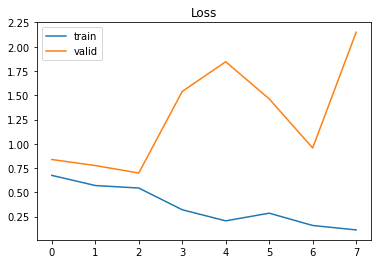

In [26]:
import matplotlib.pyplot as plt

epochs = np.arange(0,8)

plt.title('Loss') 
plt.plot(epochs, train_loss_list, label="train") 
plt.plot(epochs, vali_loss_list, label="valid") 
plt.legend()
plt.show()

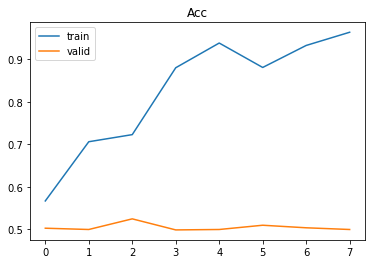

In [27]:
import matplotlib.pyplot as plt

epochs = np.arange(0,8)

plt.title('Acc') 
plt.plot(epochs, train_acc_list, label="train") 
plt.plot(epochs, vali_acc_list, label="valid") 
plt.legend()
plt.show()

epochs [0, 1, 2, 3, 4, 5, 6, 7]
loss_list 8


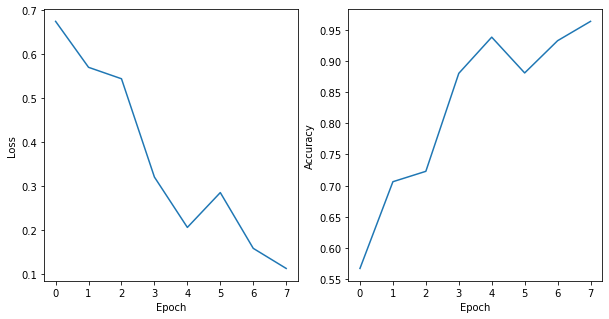

In [24]:
epochs = list(range(len(train_loss_list)))
print("epochs", epochs)
print("loss_list", len(train_loss_list))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(epochs,train_loss_list)
plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(epochs, train_acc_list)
plt.show()

torch.save(model.state_dict(), '/home/ktlim/Visual_Reasoning/task1/train4.pt')

epochs [0, 1, 2, 3, 4, 5, 6, 7]
loss_list 8


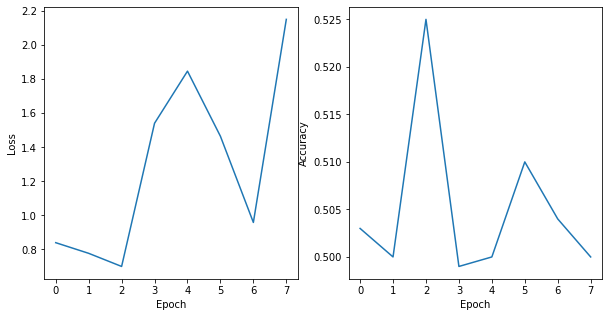

In [25]:
epochs = list(range(len(vali_loss_list)))
print("epochs", epochs)
print("loss_list", len(vali_loss_list))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(epochs,vali_loss_list)
plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(epochs, vali_acc_list)
plt.show()